Analyse des données sur le covid19



In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('/gdrive/MyDrive/Data Analyst/data.csv')

In [6]:
image=plt.imread('/gdrive/MyDrive/Python Machine Learning/slide_18.jpg')

In [8]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

In [11]:
df['dateRep']=pd.to_datetime(df['dateRep'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     61900 non-null  datetime64[ns]
 1   day                                                         61900 non-null  int64         
 2   month                                                       61900 non-null  int64         
 3   year                                                        61900 non-null  int64         
 4   cases                                                       61900 non-null  int64         
 5   deaths                                                      61900 non-null  int64         
 6   countriesAndTerritories                                     61900 non-null  object        
 7   geoId                 

In [12]:
df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


In [14]:
df.isna().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

In [15]:
df.isna().mean()

dateRep                                                       0.000000
day                                                           0.000000
month                                                         0.000000
year                                                          0.000000
cases                                                         0.000000
deaths                                                        0.000000
countriesAndTerritories                                       0.000000
geoId                                                         0.004443
countryterritoryCode                                          0.001987
popData2019                                                   0.001987
continentExp                                                  0.000000
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    0.046511
dtype: float64

In [16]:
#Suppression des valeurs manquantes
df.dropna(inplace=True)

In [17]:
df.isna().sum()

dateRep                                                       0
day                                                           0
month                                                         0
year                                                          0
cases                                                         0
deaths                                                        0
countriesAndTerritories                                       0
geoId                                                         0
countryterritoryCode                                          0
popData2019                                                   0
continentExp                                                  0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    0
dtype: int64

## Pays avec le plus grand nombre de cas

In [24]:
df.groupby('countriesAndTerritories')['cases'].sum().sort_values(ascending=False)

countriesAndTerritories
United_States_of_America       16256754
India                           9884100
Brazil                          6901952
Russia                          2653928
France                          2376852
                                 ...   
Montserrat                            8
Falkland_Islands_(Malvinas)           8
Anguilla                              7
Marshall_Islands                      3
Vanuatu                               0
Name: cases, Length: 211, dtype: int64

In [26]:
df.groupby('countriesAndTerritories')['cases','deaths'].sum().sort_values('cases',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cases,deaths
countriesAndTerritories,,
United_States_of_America,16256754,299177
India,9884100,143355
Brazil,6901952,181402
Russia,2653928,46941
France,2376852,57911
...,...,...
Montserrat,8,1
Falkland_Islands_(Malvinas),8,0
Anguilla,7,0


Pays avec Taux de Mortalité élévé

In [27]:
df_by_country=df.groupby('countriesAndTerritories')['cases','deaths'].sum().sort_values('cases',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [28]:
df_by_country['mortality_rate']=df_by_country['deaths']/df_by_country['cases']

In [30]:
df_by_country.head()

,cases,deaths,mortality_rate
countriesAndTerritories,,,
United_States_of_America,16256754,299177,0.018403
India,9884100,143355,0.014504
Brazil,6901952,181402,0.026283
Russia,2653928,46941,0.017687
France,2376852,57911,0.024365


Text(0.5, 1.0, 'Country with highest mortality rates')

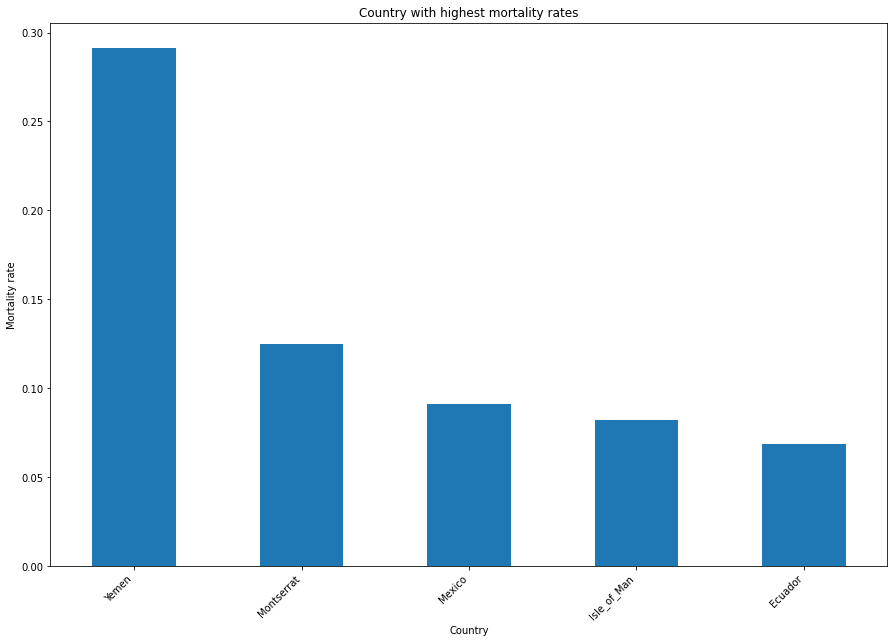

In [33]:
plt.figure(figsize=(15,10))
ax=df_by_country['mortality_rate'].sort_values(ascending=False).head(5).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right")
ax.set_xlabel("Country")
ax.set_ylabel('Mortality rate')
ax.set_title("Country with highest mortality rates")

##Pay avec le plus grand nombre de cas

Text(0.5, 1.0, 'Country with highest mortality rates')

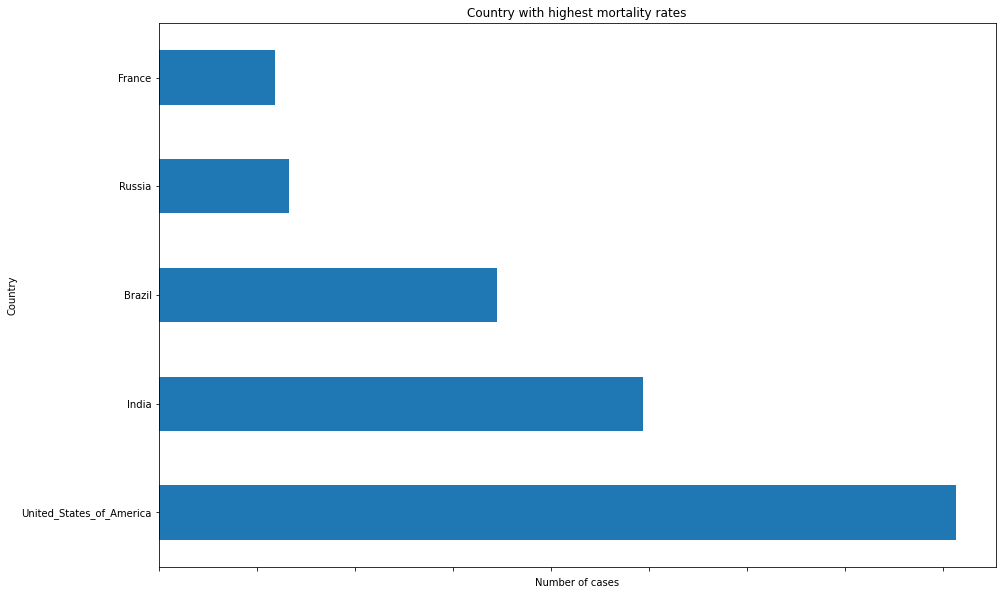

In [35]:
plt.figure(figsize=(15,10))
ax=df_by_country['cases'].sort_values(ascending=False).head(5).plot.barh()
ax.set_xticklabels(ax.get_xticklabels(),ha="right")
ax.set_ylabel("Country")
ax.set_xlabel('Number of cases')
ax.set_title("Country with highest mortality rates")

## Effet du confinement sur le nombre de cas

In [39]:
df_by_month=df.groupby('month')['cases','deaths'].sum().sort_values('cases',ascending=False)
df_by_month.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cases,deaths
month,,
11,17132585,271068
10,11947264,181042
12,8640647,151576
9,8452473,162120
8,7958523,178556


Text(0, 0.5, 'Nombre de morts')

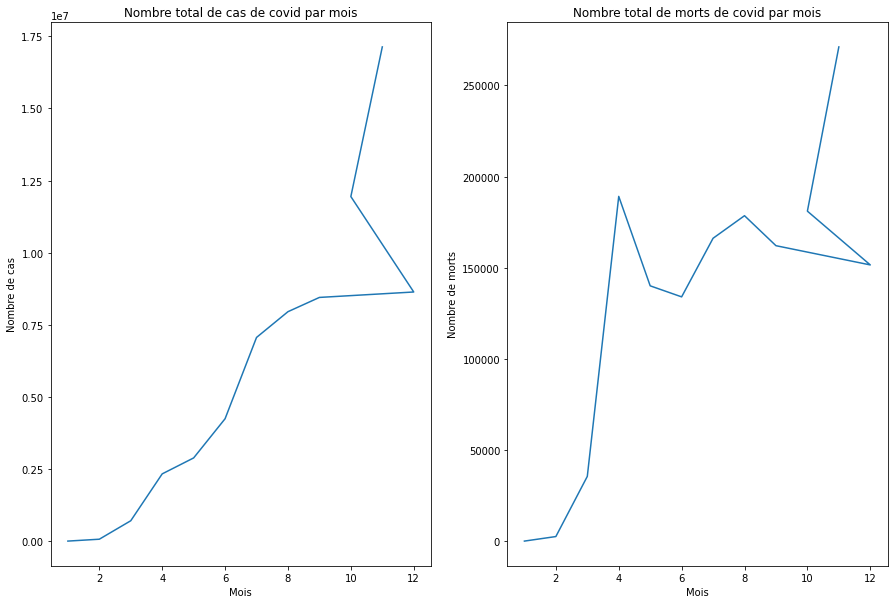

In [41]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

df_by_month['cases'].plot(kind='line',ax=ax1)
ax1.set_title("Nombre total de cas de covid par mois")
ax1.set_xlabel("Mois")
ax1.set_ylabel("Nombre de cas")


df_by_month['deaths'].plot(kind='line',ax=ax2)
ax2.set_title("Nombre total de morts de covid par mois")
ax2.set_xlabel("Mois")
ax2.set_ylabel("Nombre de morts")



In [42]:
df_germany = df[df.countriesAndTerritories == 'Germany']
df_germany_monthwise = df_germany.groupby('month')['cases','deaths'].sum()
df_germany_grouped = df_germany_monthwise.reset_index()


df_uk = df[df.countriesAndTerritories == 'United_Kingdom']
df_uk_monthwise = df_uk.groupby('month')['cases','deaths'].sum()
df_uk_grouped = df_uk_monthwise.reset_index()


df_france = df[df.countriesAndTerritories == 'France']
df_france_monthwise = df_france.groupby('month')['cases','deaths'].sum()
df_france_grouped = df_france_monthwise.reset_index()


df_italy = df[df.countriesAndTerritories == 'Italy']
df_italy_monthwise = df_italy.groupby('month')['cases','deaths'].sum()
df_italy_grouped = df_italy_monthwise.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


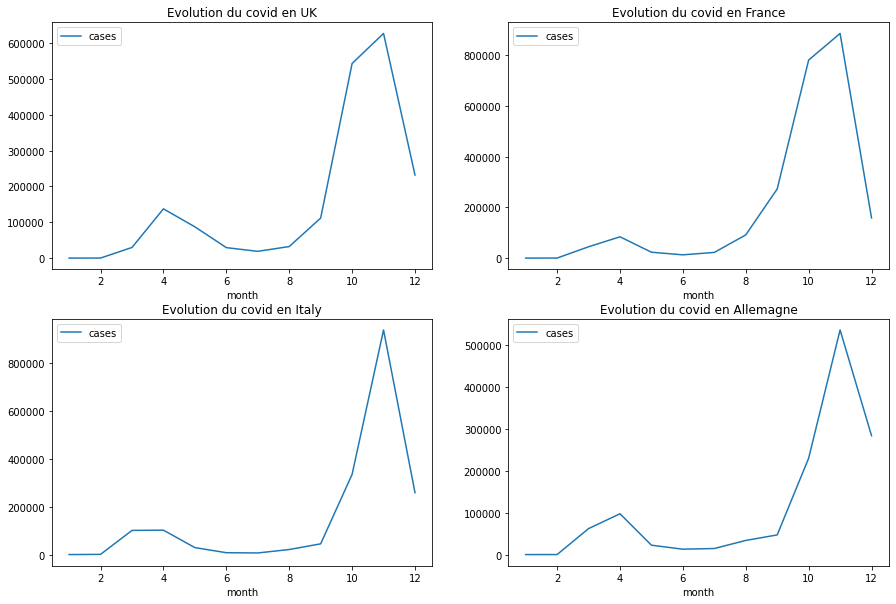

In [46]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(2,2,1)
df_uk_grouped.plot(kind='line',x='month',y='cases',ax=ax1)
ax1.set_title("Evolution du covid en UK")


ax2=fig.add_subplot(2,2,2)
df_france_grouped.plot(kind='line',x='month',y='cases',ax=ax2)
ax2.set_title("Evolution du covid en France")

ax3=fig.add_subplot(2,2,3)
df_italy_grouped.plot(kind='line',x='month',y='cases',ax=ax3)
ax3.set_title("Evolution du covid en Italy")

ax4=fig.add_subplot(2,2,4)
df_germany_grouped.plot(kind='line',x='month',y='cases',ax=ax4)
ax4.set_title("Evolution du covid en Allemagne")
plt.show()

In [47]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [48]:
df['continentExp'].value_counts()

Europe     16657
Africa     14004
America    13105
Asia       12695
Oceania     2298
Name: continentExp, dtype: int64

In [50]:
df.groupby('continentExp')['cases','deaths'].sum().sort_values('cases',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cases,deaths
continentExp,,
America,30884895,785370
Europe,21395058,479706
Asia,16780431,290097
Africa,2361775,56134
Oceania,53298,1151


In [51]:
df_continent=df.groupby('continentExp')['cases','deaths'].sum().sort_values('deaths',ascending=False)
df_continent

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cases,deaths
continentExp,,
America,30884895,785370
Europe,21395058,479706
Asia,16780431,290097
Africa,2361775,56134
Oceania,53298,1151


In [52]:
df_continent['Mortality_rate']=df_continent['deaths']/df_continent['cases']

In [53]:
df_continent

,cases,deaths,Mortality_rate
continentExp,,,
America,30884895,785370,0.025429
Europe,21395058,479706,0.022421
Asia,16780431,290097,0.017288
Africa,2361775,56134,0.023768
Oceania,53298,1151,0.021596
